# Statistical Model for Analyzing wine quality using Gaussian distribution

In [4]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, kstest
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")

In [8]:
from sklearn.datasets import fetch_openml

data = fetch_openml(name = "wine-quality-red", version = 1, as_frame = True)
df = data.frame

In [10]:
df["class"] = df["class"].astype("int64")

In [14]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,class
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [16]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Figure size 1200x1000 with 0 Axes>

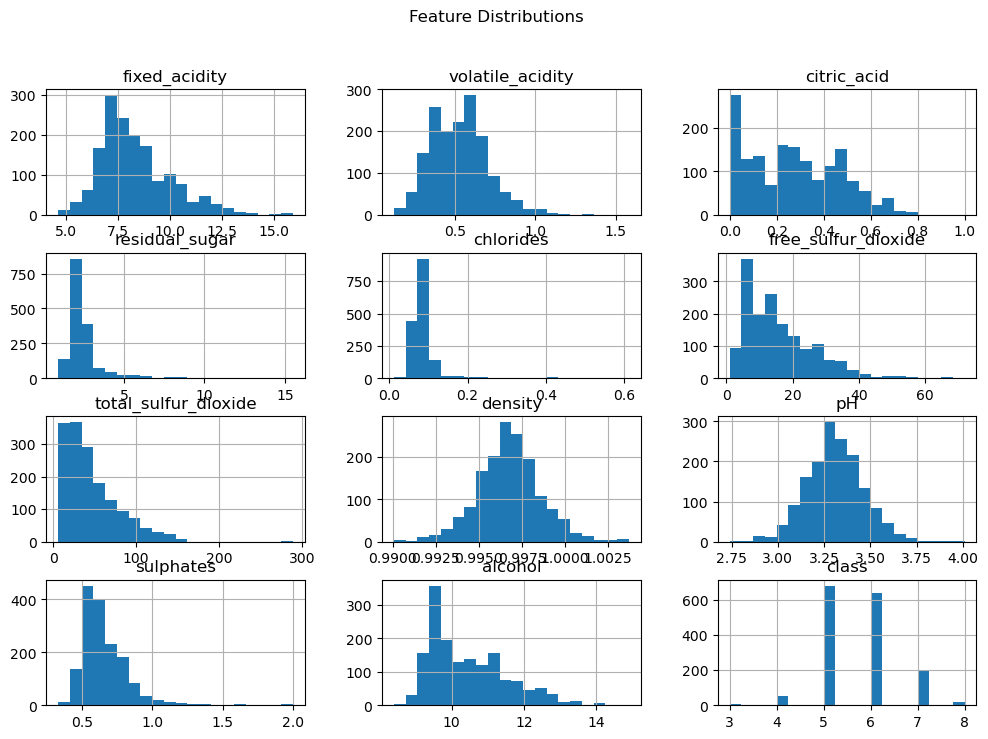

In [18]:
plt.figure(figsize=(12, 10))
df.hist(bins=20, figsize=(12, 8))
plt.suptitle("Feature Distributions")
plt.show()

In [20]:
features = [col for col in df.columns if col != "class"]
X = df[features]
X = (X - X.mean()) / X.std()
y = df["class"]
y= y.apply(lambda x: 1 if x >= 6 else 0)

In [22]:
#Compute mean and std for gaussian fitting
stats = X.agg(["mean", "std"])
print(stats)

      fixed_acidity  volatile_acidity   citric_acid  residual_sugar  \
mean   4.088176e-16      1.599721e-16 -8.887339e-17   -1.155354e-16   
std    1.000000e+00      1.000000e+00  1.000000e+00    1.000000e+00   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide       density  \
mean  3.554936e-16        -4.443669e-17          3.554936e-17 -3.466062e-14   
std   1.000000e+00         1.000000e+00          1.000000e+00  1.000000e+00   

                pH     sulphates       alcohol  
mean  2.879498e-15  6.754377e-16  5.332403e-17  
std   1.000000e+00  1.000000e+00  1.000000e+00  


In [24]:
#Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

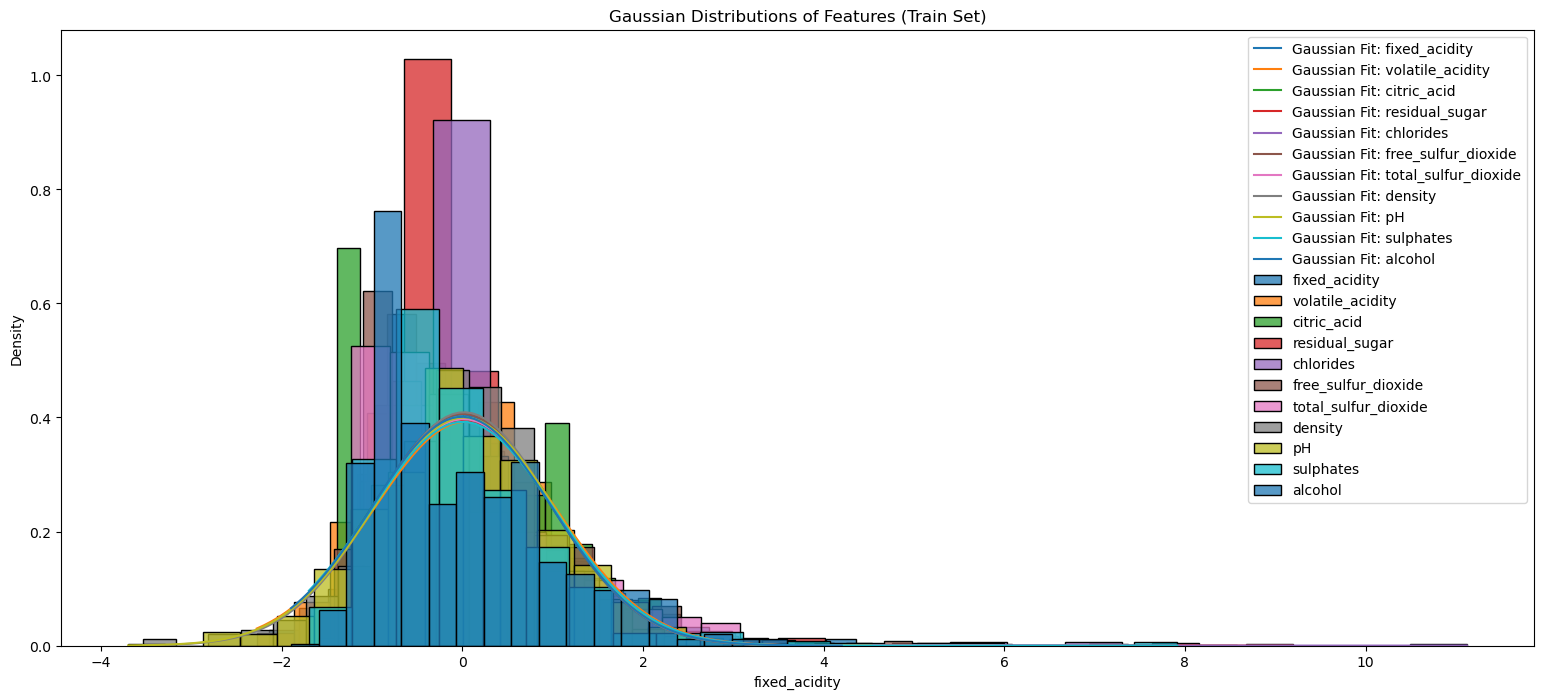

In [28]:
#fit gaussian distributions
plt.figure(figsize=(19, 8))
for feature in features:
    mean, std = X_train[feature].mean(), X_train[feature].std()
    x = np.linspace(X_train[feature].min(), X_train[feature].max(), 100)
    pdf = norm.pdf(x, mean, std)
    sns.histplot(X_train[feature], kde=False, bins=20, stat="density", label=feature)
    plt.plot(x, pdf, label=f"Gaussian Fit: {feature}")
plt.legend()
plt.title("Gaussian Distributions of Features (Train Set)")
plt.show()

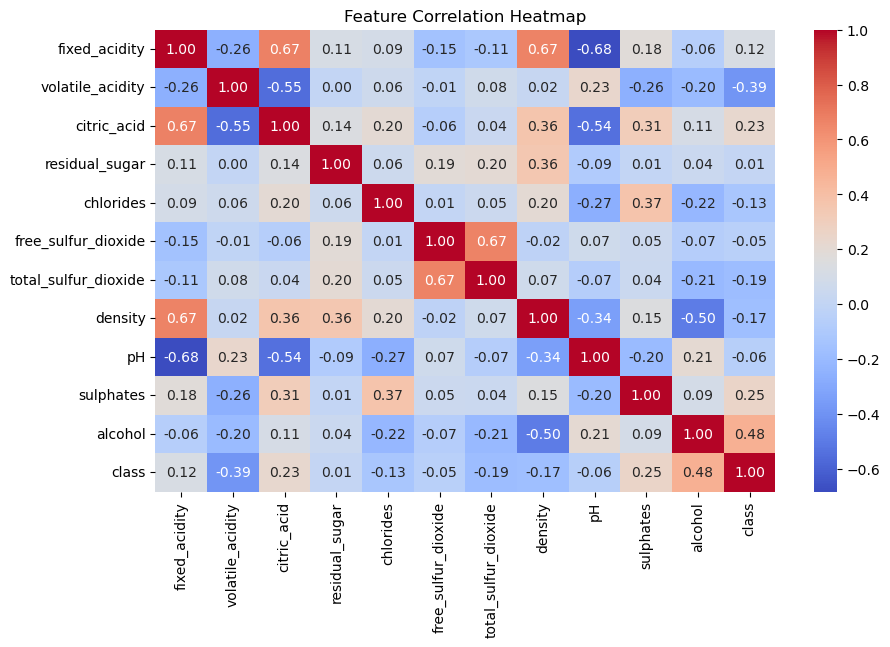

In [30]:
#correlation analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [32]:
#Gaussian Naive Bayes classification
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [34]:
#Evaluate model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Naive Bayes Accuracy: 0.7416666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.69      0.70       213
           1       0.76      0.78      0.77       267

    accuracy                           0.74       480
   macro avg       0.74      0.74      0.74       480
weighted avg       0.74      0.74      0.74       480



In [36]:
#Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components = 2, random_state = 42)
gmm.fit(X_train)
gmm_labels = gmm.predict(X_test)
print("GMM Accuracy:", accuracy_score(y_test, gmm_labels))

GMM Accuracy: 0.4354166666666667


In [40]:
# KS test for Gaussian Fit
for feature in features:
    ks_stat, p_value = kstest(X[feature], 'norm', args=(X[feature].mean(), X[feature].std()))
    print(f"KS test for {feature}: Statistic={ks_stat:.4f}, P-value={p_value:.4f}")

KS test for fixed_acidity: Statistic=0.1105, P-value=0.0000
KS test for volatile_acidity: Statistic=0.0547, P-value=0.0001
KS test for citric_acid: Statistic=0.0839, P-value=0.0000
KS test for residual_sugar: Statistic=0.2607, P-value=0.0000
KS test for chlorides: Statistic=0.2596, P-value=0.0000
KS test for free_sulfur_dioxide: Statistic=0.1112, P-value=0.0000
KS test for total_sulfur_dioxide: Statistic=0.1210, P-value=0.0000
KS test for density: Statistic=0.0448, P-value=0.0032
KS test for pH: Statistic=0.0404, P-value=0.0106
KS test for sulphates: Statistic=0.1248, P-value=0.0000
KS test for alcohol: Statistic=0.1215, P-value=0.0000
